In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Once mounted, you can access files in your Google Drive like this:
file_path = '/content/drive/My Drive/Dear/Data.xlsx'

# Read data from Excel file
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Convert "arrival time" column to datetime format
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

# Extract just the date from the "arrival time"
df['arrival_date'] = df['arrival_time'].dt.date

# Initialize a list to store the results
result_data = []

# Loop through each unique date in the dataset
for date in df['arrival_date'].unique():
    # Filter the dataframe to include patients who are still in the hospital on the given date
    patients_today = df[(df['arrival_date'] <= date) & (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date))].shape[0]

    # Calculate the number of patients for day before, 3 days before, 5 days before, and 7 days before
    patients_day_before = df[(pd.to_datetime(df['arrival_date']) <= pd.to_datetime(date) - pd.Timedelta(days=1)) & (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date) - pd.Timedelta(days=1))].shape[0]
    patients_3_days_before = df[(pd.to_datetime(df['arrival_date']) <= pd.to_datetime(date) - pd.Timedelta(days=2)) & (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date) - pd.Timedelta(days=3))].shape[0]
    patients_5_days_before = df[(pd.to_datetime(df['arrival_date']) <= pd.to_datetime(date) - pd.Timedelta(days=3)) & (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date) - pd.Timedelta(days=5))].shape[0]
    patients_7_days_before = df[(pd.to_datetime(df['arrival_date']) <= pd.to_datetime(date) - pd.Timedelta(days=7)) & (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date) - pd.Timedelta(days=7))].shape[0]

    # Append the results to the result list
    result_data.append({'Date': date,
                        'Patients': patients_today,
                        'Patients_Day_Before': patients_day_before,
                        'Patients_2_Days_Before': patients_3_days_before,
                        'Patients_3_Days_Before': patients_5_days_before,
                        'Patients_7_Days_Before': patients_7_days_before})

# Create a DataFrame from the result list
result_df = pd.DataFrame(result_data)

# Write the new DataFrame to an Excel file
# result_df.to_excel("patient_counts13.xlsx", index=False)

# Save results to a new Excel file
output_file_path = '/content/drive/My Drive/Dear/patient_counts13.xlsx'
result_df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)


Clustering results saved to: /content/drive/My Drive/Dear/patient_counts13.xlsx


", \n                        'Patients_Day_Before': patients_day_before, \n                        'Patients_2_Days_Before': patients_3_days_before, \n                        'Patients_3_Days_Before': patients_5_days_before, \n                        'Patients_7_Days_Before': patients_7_days_before"

ACF Values:
Lag 1: 1.0
Lag 2: 0.9033369105146843
Lag 3: 0.8159050344366132
Lag 4: 0.746111945842355
Lag 5: 0.7020478160364788
Lag 6: 0.6679601320623585
Lag 7: 0.6396949021449246
Lag 8: 0.6085486998718094
Lag 9: 0.5747390929446253
Lag 10: 0.5536299681205682
Lag 11: 0.5439305306913859
Lag 12: 0.5327478118919136
Lag 13: 0.5270417772781352
Lag 14: 0.5191036982661786
Lag 15: 0.5090905109403544
Lag 16: 0.49953376490999557
Lag 17: 0.49130701704097174
Lag 18: 0.4772220199935775
Lag 19: 0.46531561920579173
Lag 20: 0.45245360177061494
Lag 21: 0.4398910895465935

PACF Values:
Lag 1: 1.0
Lag 2: 0.9038904257784801
Lag 3: -0.0006141076555537917
Lag 4: 0.05024374744882003
Lag 5: 0.10901963502726242
Lag 6: 0.04968443844172242
Lag 7: 0.042678666540067425
Lag 8: 0.002174288494122126
Lag 9: -0.007123094582464132
Lag 10: 0.06780434268352863
Lag 11: 0.06565006540408284
Lag 12: 0.009751572715262807
Lag 13: 0.05918113705568855
Lag 14: 0.020483250654538713
Lag 15: 0.013369505617890713
Lag 16: 0.02276050418567

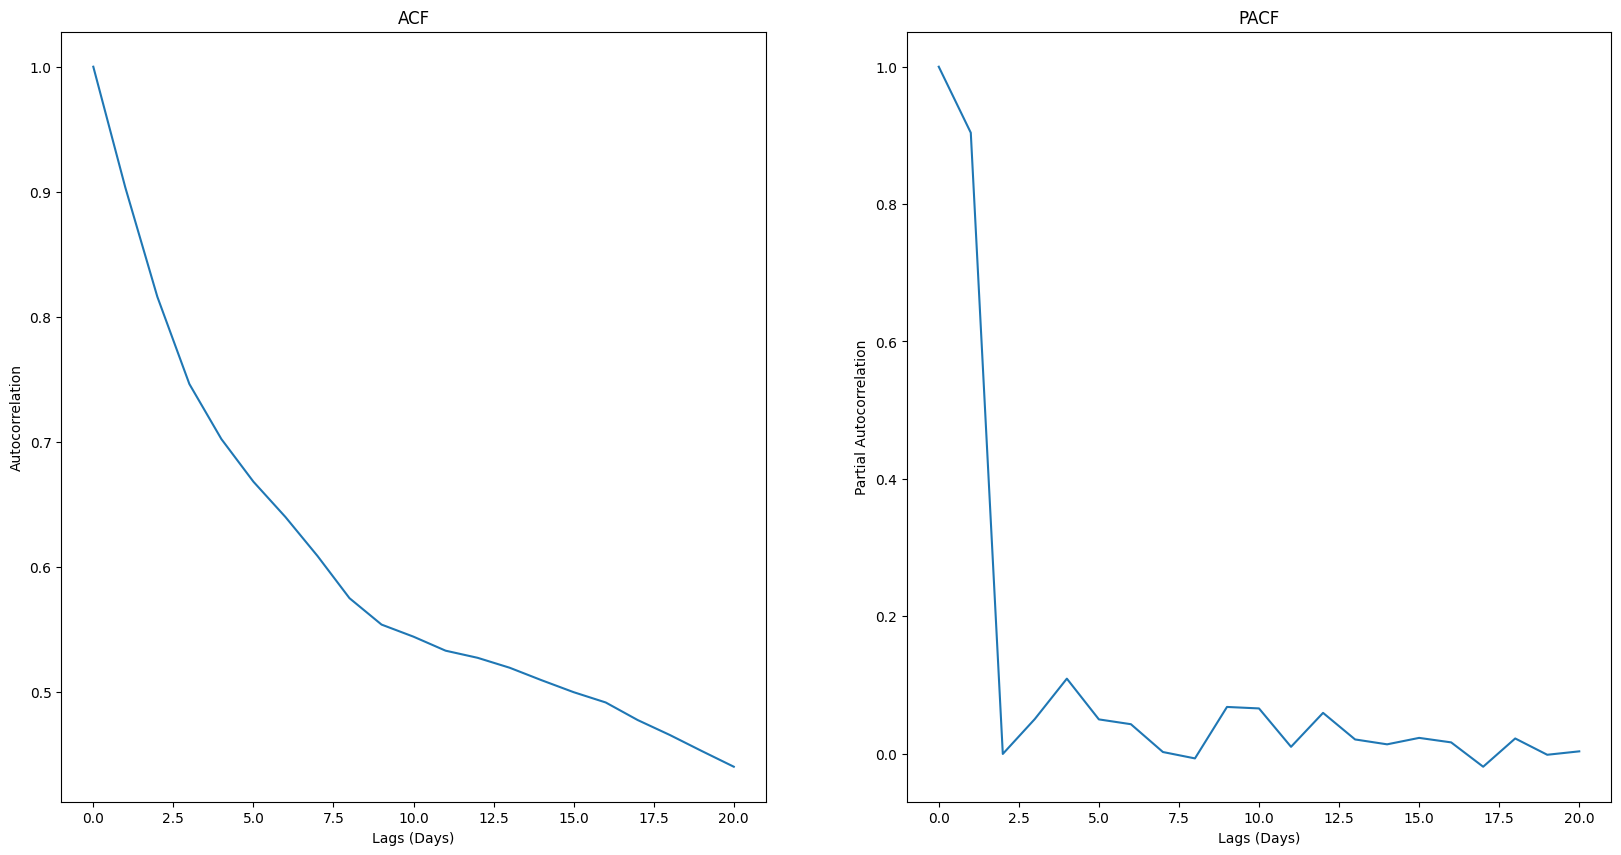

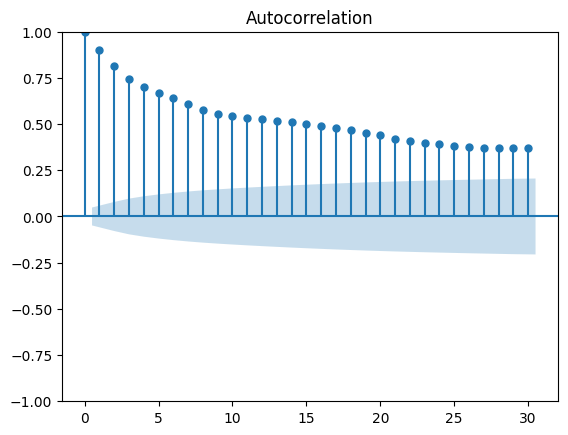

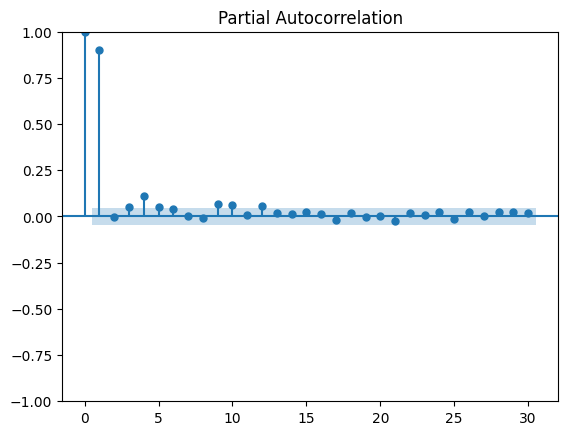

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Once mounted, you can access files in your Google Drive like this:
file_path = '/content/drive/My Drive/Dear/patient_counts13.xlsx'

# Read data from Excel file
data = pd.read_excel(file_path)

# Set Date as the index (assuming dates are unique)
data.set_index('Date', inplace=True)

# Daily Patients as the time series
patient_ts = data['Patients']

# Number of lags to consider (change this if needed)
num_lags = 20

# Calculate ACF and PACF with the specified number of lags
acf_values = acf(patient_ts, nlags=num_lags)
pacf_values = pacf(patient_ts, nlags=num_lags)

# Print ACF values for each lag
print("ACF Values:")
for i, value in enumerate(acf_values):
    print(f"Lag {i+1}: {value}")

# Print PACF values for each lag
print("\nPACF Values:")
for i, value in enumerate(pacf_values):
    print(f"Lag {i+1}: {value}")


# Plot the ACF and PACF values
plt.figure(figsize=(20, 10))

# Option 1 (using acf_values for both x and y) - preferred approach
plt.subplot(121)
plt.plot(acf_values)  # Use acf_values for both x and y
plt.xlabel('Lags (Days)')  # Adjust label for interpretability
plt.ylabel('Autocorrelation')
plt.title('ACF')

# Option 2 (slicing acf_values to match range(num_lags))
# plt.subplot(121)
# plt.plot(range(num_lags), acf_values[:num_lags])  # Slice acf_values
# plt.xlabel('Lags (Days)')  # Label adjusted for daily data
# plt.ylabel('Autocorrelation')
# plt.title('ACF')

plt.subplot(122)
plt.plot( pacf_values)  # Use range for x-axis labels
plt.xlabel('Lags (Days)')  # Label adjusted for daily data
plt.ylabel('Partial Autocorrelation')
plt.title('PACF')

plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
bed_demand = data['Patients']

 # Calculate and plot ACF
fig, ax = plt.subplots()
acf = plot_acf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
plt.title(f"Autocorrelation")
plt.show()

# Calculate and plot PACF
fig, ax = plt.subplots()
pacf = plot_pacf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
plt.title(f"Partial Autocorrelation")
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(patient_ts)
print("\nADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Access critical values from the 5th element (index 4)
critical_values = adf_result[4]
print(f"Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Interpretation (adjust significance level as needed)
if adf_result[1] < 0.05:
    print("The data is likely stationary (no unit root).")
else:
    print("The data might have a unit root (non-stationary).")


ADF Test Results:
ADF Statistic: -5.086722322390667
p-value: 1.490692052172905e-05
Critical Values:
	1%: -3.4343905216323187
	5%: -2.8633246558950796
	10%: -2.567720112819826
The data is likely stationary (no unit root).


In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'arrival_time' and 'total_los' columns are present
# Convert 'arrival_time' column to datetime format
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

# Extract just the date from the 'arrival_time'
df['arrival_date'] = df['arrival_time'].dt.date

# Initialize a list to store the results
result_data = []

# Loop through each unique date in the dataset
for date in df['arrival_date'].unique():
    # Filter the dataframe to include patients who are still in the hospital on the given date
    patients_today = df[(df['arrival_date'] <= date) &
                        (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date))].shape[0]

    # Initialize a dictionary to store the results for the current date
    result = {'Date': date, 'Patients': patients_today}

    # Loop through lag values from 1 to 10
    for lag in range(1, 11):
        patients_lag = df[(pd.to_datetime(df['arrival_date']) <= pd.to_datetime(date) - pd.Timedelta(days=lag)) &
                          (pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['total_los'], unit='D') >= pd.to_datetime(date) - pd.Timedelta(days=lag))].shape[0]
        result[f'Patients_{lag}_Days_Before'] = patients_lag

    # Append the results to the result list
    result_data.append(result)

# Create a DataFrame from the result list
result_df = pd.DataFrame(result_data)

# Save the results to an Excel file
output_file_path = '/content/drive/My Drive/Dear/patient_counts14.xlsx'
result_df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)


Clustering results saved to: /content/drive/My Drive/Dear/patient_counts14.xlsx
